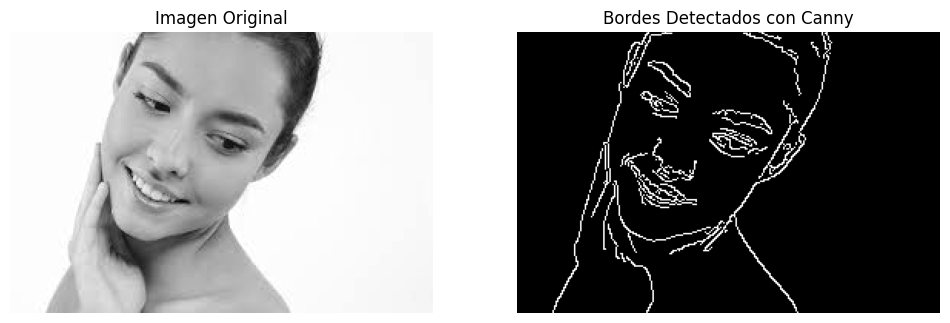

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
img = cv2.imread(r'aaa.jpeg', 0)

# Aplicar el algoritmo de Canny a la imagen completa
bordes = cv2.Canny(img, 100, 200)

# Crear una figura para mostrar los resultados
plt.figure(figsize=(12, 8))

# Mostrar la imagen original
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Mostrar los bordes detectados con Canny
plt.subplot(122)
plt.imshow(bordes, cmap='gray')
plt.title('Bordes Detectados con Canny')
plt.axis('off')

plt.show()


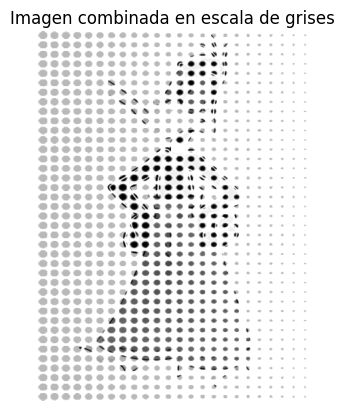

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

PatoLucas = cv2.imread(r'Lucas.jpg')
PatoLucasGris = cv2.cvtColor(PatoLucas, cv2.COLOR_BGR2GRAY)
Puntos = cv2.imread(r"PuntosLucas.png")
PuntosGris = cv2.cvtColor(Puntos, cv2.COLOR_BGR2GRAY)
PuntosGris = cv2.resize(PuntosGris, (PatoLucasGris.shape[1], PatoLucasGris.shape[0]))
Combinacion = cv2.addWeighted(PatoLucasGris, 1, PuntosGris, 1, 0)
plt.imshow(Combinacion, cmap='gray')
plt.title('Imagen combinada en escala de grises')
plt.axis('off')
plt.show()



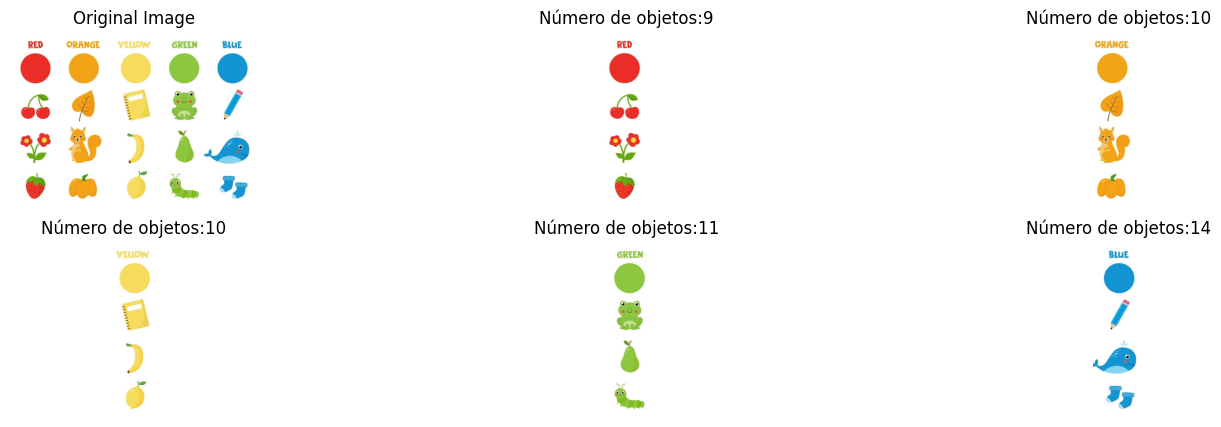

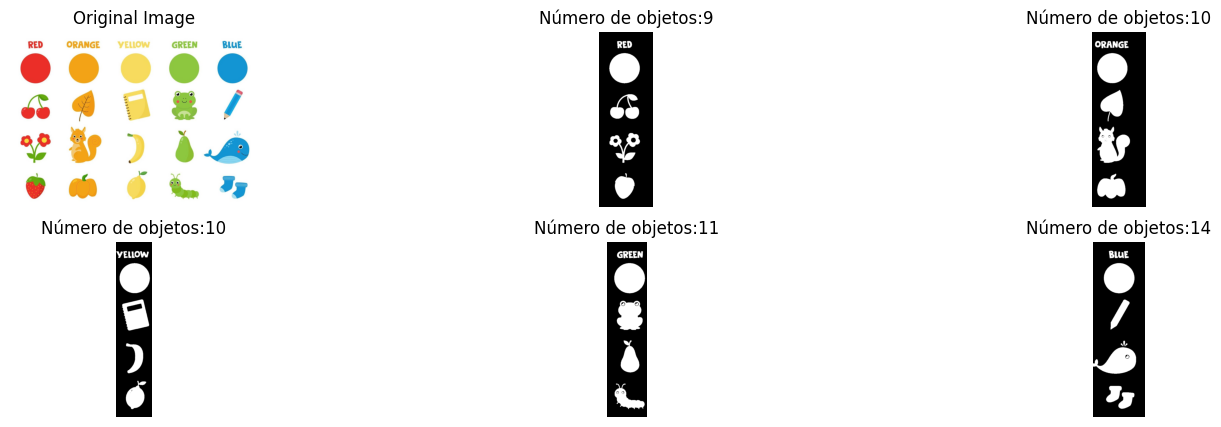

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure as ms

def red_super_counter_2(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,binary = cv2.threshold(img_gris, 200, 255, cv2.THRESH_BINARY_INV)
    target=ms.label(binary,connectivity=2)
    cont = np.max(target)
    return cont,binary
def orange_super_counter_2(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,binary = cv2.threshold(img_gris, 220, 255, cv2.THRESH_BINARY_INV)
    target=ms.label(binary,connectivity=2)
    cont = np.max(target)
    return cont,binary
def yellow_super_counter_2(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,binary = cv2.threshold(img_gris, 230, 255, cv2.THRESH_BINARY_INV)
    target=ms.label(binary,connectivity=2)
    cont = np.max(target)
    return cont,binary
def green_super_counter_2(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,binary = cv2.threshold(img_gris, 230, 232, cv2.THRESH_BINARY_INV)
    target=ms.label(binary,connectivity=2)
    cont = np.max(target)
    return cont,binary
def blue_super_counter_2(img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _,binary = cv2.threshold(img_gris, 230, 245, cv2.THRESH_BINARY_INV)
    target=ms.label(binary,connectivity=2)
    cont = np.max(target)
    return cont,binary

imagen = cv2.imread('objetos.jpg')

red_img_zone=imagen[1:1000,1:300,:] 
orange_img_zone=imagen[1:1000,300:600,:] 
yellow_img_zone=imagen[1:1000,600:800,:] 
green_img_zone=imagen[1:1000,850:1070,:] 
blue_img_zone=imagen[1:1000,1100:1400,:] 

red_img_count,red_binary = red_super_counter_2(red_img_zone)
orange_img_count,orange_binary = orange_super_counter_2(orange_img_zone)
yellow_img_count,yellow_binary = yellow_super_counter_2(yellow_img_zone)
green_img_count,green_binary = green_super_counter_2(green_img_zone)
blue_img_count,blue_binary = blue_super_counter_2(blue_img_zone)

plt.figure(figsize=(18, 5))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title(f'Número de objetos:{red_img_count}')
plt.imshow(cv2.cvtColor(red_img_zone, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title(f'Número de objetos:{orange_img_count}')
plt.imshow(cv2.cvtColor(orange_img_zone, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title(f'Número de objetos:{yellow_img_count}')
plt.imshow(cv2.cvtColor(yellow_img_zone, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title(f'Número de objetos:{green_img_count}')
plt.imshow(cv2.cvtColor(green_img_zone, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title(f'Número de objetos:{blue_img_count}')
plt.imshow(cv2.cvtColor(blue_img_zone, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

plt.figure(figsize=(18, 5))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title(f'Número de objetos:{red_img_count}')
plt.imshow(red_binary,cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title(f'Número de objetos:{orange_img_count}')
plt.imshow(orange_binary,cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title(f'Número de objetos:{yellow_img_count}')
plt.imshow(yellow_binary,cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title(f'Número de objetos:{green_img_count}')
plt.imshow(green_binary,cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title(f'Número de objetos:{blue_img_count}')
plt.imshow(blue_binary,cmap="gray")
plt.axis("off")

plt.show()

